# <font style="color:blue">Pretrained Classification Models in Torchvision</font>
In this notebook, we will learn how to work with the state-of-the-art models available in Torchvision package. 

We have already seen the architectures of some important models like AlexNet, VGGNet, ResNet, etc in the previous section. We will see how these models can be imported in our code using torchvision.

In [11]:
# Import torch and torchvision modules
import torch
import wget
from torchvision import models
from torchvision.utils import make_grid

## <font style="color:blue">1. List the Models </font>
We have imported the models module from torchvision. Now, let's see what are the available models.

In [6]:
# Print the models available in torchvision
print(dir(models))

['AlexNet', 'AlexNet_Weights', 'ConvNeXt', 'ConvNeXt_Base_Weights', 'ConvNeXt_Large_Weights', 'ConvNeXt_Small_Weights', 'ConvNeXt_Tiny_Weights', 'DenseNet', 'DenseNet121_Weights', 'DenseNet161_Weights', 'DenseNet169_Weights', 'DenseNet201_Weights', 'EfficientNet', 'EfficientNet_B0_Weights', 'EfficientNet_B1_Weights', 'EfficientNet_B2_Weights', 'EfficientNet_B3_Weights', 'EfficientNet_B4_Weights', 'EfficientNet_B5_Weights', 'EfficientNet_B6_Weights', 'EfficientNet_B7_Weights', 'EfficientNet_V2_L_Weights', 'EfficientNet_V2_M_Weights', 'EfficientNet_V2_S_Weights', 'GoogLeNet', 'GoogLeNetOutputs', 'GoogLeNet_Weights', 'Inception3', 'InceptionOutputs', 'Inception_V3_Weights', 'MNASNet', 'MNASNet0_5_Weights', 'MNASNet0_75_Weights', 'MNASNet1_0_Weights', 'MNASNet1_3_Weights', 'MaxVit', 'MaxVit_T_Weights', 'MobileNetV2', 'MobileNetV3', 'MobileNet_V2_Weights', 'MobileNet_V3_Large_Weights', 'MobileNet_V3_Small_Weights', 'RegNet', 'RegNet_X_16GF_Weights', 'RegNet_X_1_6GF_Weights', 'RegNet_X_32GF_

Wow! There are so many models present in torchvision. 

You can see that apart from the classification models like AlexNet, DenseNet, GoogleNet, there are other models like `detection`, `segmentation`, `video`. We will discuss only Classification models in this notebook.

You can also see that there are different versions of the same model, e.g. vgg11_bn and vgg11 which are the models with and without Batch Normalization.

## <font style="color:blue">2. Load a Model</font>
Let's load the AlexNet model. It has 5 cnvolutional layers and 3 fully connected layers. You should check out other models and see how the predictions change and compare the inference times.

In [7]:
# Load alexnet model
alexnet = models.alexnet(pretrained=True)

print(alexnet)

# Put our model in eval mode
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## <font style="color:blue">3. Load the classes mapping file </font>

The models are all trained on the ImageNet dataset. However, the output of the network does not say anything about the class name. It just produces numbers as output. We can find the class to which the object belongs which is a number between 0 to 999. So, we need a mapping file from these numbers to the actual classes. 

We download the file and read it in a variable named `classes`.

In [13]:
# Download classes text file
# Load labels
with open('imagenet_classes.txt') as f:
    classes = [line.strip() for line in f.readlines()]


Let us print the first 5 classes in the file

In [14]:
print(classes[:5])

['tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'tiger shark, Galeocerdo cuvieri', 'hammerhead, hammerhead shark']


## <font style="color:blue">4. Load the image </font>
Let's download an image of a panda from wikipedia and load the downloaded image using the PIL library.

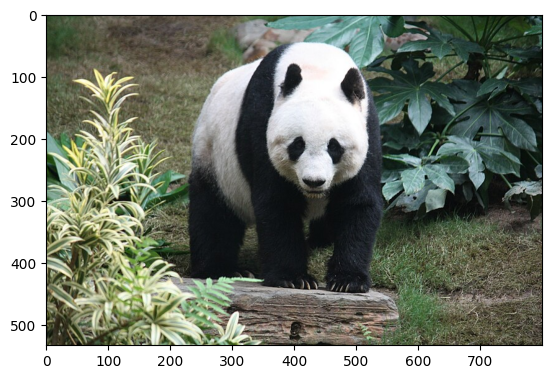

In [17]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
img = Image.open("Grosser_Panda.JPG")
plt.imshow(img)

## <font style="color:blue">5. Apply Transforms</font>
We will use the transforms module to apply some transformations to the input image before feeding it to the network.

### <font style="color:green">Why do we need transforms?</font>
We all know that the models are trained on the huge datasets. But you should also know that the data used while training is not used as is and it is pre-processed using some transformations. 

For example, the images used while training may be of different sizes. But the network accepts fixed sized inputs. Thus, the images need to be resized so that they can be fed to the network. 

Similarly, it is a standard practice to normalize the intensity values to lie between [0,1]. 

Thus, we use transforms to make the input test images compatible with what the network expects!

### <font style="color:green">What transforms do we need for using pretrained models? </font>
From PyTorch docs:
> All pre-trained models expect input images normalized in the same way, i.e. **mini-batches** of 3-channel RGB images of shape (3 x H x W), where **H and W are expected to be at least 224**. The images have to be loaded in to a **range of [0, 1]** and then **normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].**

We can achieve the above using the following code

In [18]:
# Specify image transformations
from torchvision import transforms

transform = transforms.Compose([            
 transforms.Resize(256),                    
 transforms.CenterCrop(224),                # Ensure images are of size 224
 transforms.ToTensor(),                     # Convert the image to float tensor of range [0,1]
 transforms.Normalize(                      
 mean=[0.485, 0.456, 0.406],                # Normalize data with the mean
 std=[0.229, 0.224, 0.225]                  # Normalize data with the std
 )])

# Apply the transform to the input image
img_t = transform(img)

In [19]:
# Create a mini-batch 
batch_t = torch.unsqueeze(img_t, 0)

## <font style="color:blue">6. Perform Inference </font>
Once we have the mini-batch with the input image, we can pass it through the network and get the predictions.

In [20]:
# Carry out inference
out = alexnet(batch_t)
print(out.shape)
print(out)

torch.Size([1, 1000])
tensor([[-2.9647e+00, -3.7134e+00, -1.0892e+00, -5.4037e+00, -5.6462e+00,
         -2.0270e+00,  1.4694e+00,  3.5841e-01,  3.8402e+00,  2.7699e+00,
         -9.9926e+00, -4.4482e+00, -2.1450e+00, -3.3560e+00, -1.6449e+00,
         -5.0148e+00, -2.7298e+00,  4.2839e+00,  6.6237e+00,  1.1492e+00,
         -3.8662e+00,  2.3693e+00,  7.4447e-01,  1.1318e+01,  3.6335e+00,
         -1.1371e+00, -2.6336e+00, -1.0089e+01, -1.2937e+00, -8.6386e-01,
         -4.0608e+00, -2.9206e+00, -3.3979e+00,  7.9302e-01, -1.2302e+00,
          2.5782e+00,  6.8861e+00, -1.7585e+00, -5.2877e+00, -4.4127e+00,
         -5.5648e+00, -6.6541e+00, -5.0488e+00, -4.9895e+00, -5.5260e+00,
         -4.1460e+00, -4.0626e+00, -3.9144e+00,  4.4171e-02, -4.8163e+00,
         -2.7833e+00,  2.7927e+00, -4.6476e+00, -2.3088e-01, -1.8693e+00,
         -2.5798e+00,  1.8557e+00, -5.9411e+00, -2.1782e+00, -5.9729e+00,
         -3.7323e+00, -2.4251e+00, -2.1703e+00, -1.1876e-01, -5.0827e+00,
          8.4027

## <font style="color:blue">7. Decode Predictions </font>
The prediction we get from the above step does not say anything about confidence of prediction. So, we apply the softmax function to the output and convert the numbers into probability measures. 

We also sort the predictions in descending order and take the first 5 values. These are the top-5 predictions from the network for the given input image. Let's see what the network predicts for our input image. The first value is the prediction and the second value is the confidence score ( in % )

In [21]:
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
for idx in indices[0][:5]:
    print("Class:{}, Class Name: {}, Confidence: {:.4f}%".format(idx,classes[idx], percentage[idx].item()))

Class:388, Class Name: giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca, Confidence: 99.9964%
Class:375, Class Name: colobus, colobus monkey, Confidence: 0.0036%
Class:295, Class Name: American black bear, black bear, Ursus americanus, Euarctos americanus, Confidence: 0.0000%
Class:805, Class Name: soccer ball, Confidence: 0.0000%
Class:384, Class Name: indri, indris, Indri indri, Indri brevicaudatus, Confidence: 0.0000%


You can see that the network correctly identifies the giant panda with very high confidence. 

## <font style="color:blue">8. Your Turn </font>
Now, it's your turn to play! Change the model and see how different models produce different outputs.

Also check how much time it takes for each prediction for different models.

## <font style="color:blue">9. Comparison of Models </font>
So far we have discussed how we can use pre-trained models to perform image classification but one question that we have yet to answer is how do we decide which model to choose for a particular task. In this section we will compare the pre-trained models on the basis of the following criteria:

1. **Top-1 Error**: A top-1 error occurs if the class predicted by a model with highest confidence is **not** the same as the true class.
1. **Top-5 Error**: A top-5 error occurs when the true class is not among the top 5 classes predicted by a model (sorted in terms of confidence).
1. **Inference Time on CPU**: Inference time is the time taken for model inference step on CPU.
1. **Inference Time on GPU**: Inference time is the time taken for model inference step on GPU.
1. **Model size**: Here size stands for the physical space occupied by the **.pth** file of the pre-trained model supplied by PyTorch


A **good** model shall have **low Top-1 error**, **low Top-5 error**, **low inference time** on CPU and GPU and **low model size**. Let us look at the graphs to pick the best model!

#### <font style = "color:rgb(200,0,0)">We are not sharing the code for this and you should treat it as a Practice exercise. Just take any image and use different models to perform inference on the same image with different models and record the various metrics for performance and compare.</font>

### <font style="color:green">9.1. Accuracy Comparison of Models</font>
The first criterion we are going to discuss consists of Top-1 and Top-5 errors. Top-1 error refers to errors when the top predicted class is different from the ground truth. Since the problem is rather a difficult one, there is another error measure called Top-5 error. A prediction is classified as an error if none of the top-5 predicted classes are correct.

![](https://www.learnopencv.com/wp-content/uploads/2019/06/Accuracy-Comparison-of-Models.png)

Notice from the graph that both the errors follow a similar trend. **AlexNet**  was the first attempt based on Deep Learning and there has been improvement in the error since then. **Notable** mentions are GoogLeNet, ResNet, VGGNet, ResNext.

### <font style="color:green">9.2. Inference Time Comparison</font>

Next, we will compare the models based on the time taken for model inference. One image was supplied to each model multiple times and the inference time for all the iterations was averaged. Similar process was performed for CPU and then for GPU on Google Colab. Even though there are some variations in the order, we can see that **SqueezeNet**, **ShuffleNet** and **ResNet-18** had a really low inference time, which is exactly what we want.

![](https://www.learnopencv.com/wp-content/uploads/2019/06/Model-Inference-Time-Comparison-on-CPU-ms-Lower-is-better-.png)

![](https://www.learnopencv.com/wp-content/uploads/2019/06/Model-Inference-Time-Comparison-on-GPU-ms-Lower-is-better-.png)

### <font style="color:green">9.3. Model Size Comparison</font>

A lot of times when we are using a Deep Learning model on an android or iOS device, the model size becomes a deciding factor, sometimes even more important than accuracy. **SqueezeNet** has the minimum model size (5 MB), followed by **ShuffleNet V2** (6 MB) and **MobileNet V2** (14 MB). It's obvious why these models are preferred in mobile apps utilizing deep learning.

![](https://www.learnopencv.com/wp-content/uploads/2019/06/Model-Size-Comparison.png)

### <font style="color:green">9.4. Overall Comparison</font>

We discussed about which model performed better on the basis of a particular criterion. We can squeeze all those important details in one bubble chart which we can then refer to for deciding which model to go for based on our requirements.

The x-coordinate we are using is Top-1 error (**lower is better**). The y-coordinate is the inference time on GPU in milliseconds (**lower is better**). The bubble size represents the model size (**lower is better**).

#### <font style = "color:rgb(8,133,37)">NOTE :</font>

- Smaller Bubbles are better in terms of model size.
- Bubbles near the origin are better in terms of both Accuracy and Speed.

![](https://www.learnopencv.com/wp-content/uploads/2019/06/Pre-Trained-Model-Comparison-1024x633.png)

## <font style="color:blue">10. Final Verdict</font>


1. It is clear from the above graph that **ResNet50** is the best model in terms of all three parameters ( small in size and closer to origin )
1. DenseNets and ResNext101 are expensive on inference time.
1. AlexNet and SqueezeNet have pretty high error rate.